https://www.kaggle.com/yassineghouzam/introduction-to-cnn-keras-0-997-top-6

In [2]:
import sys
print(sys.executable)

E:\Anaconda3\envs\tensorflowgpu\python.exe


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import os
from IPython.display import clear_output
%matplotlib inline

import tensorflow as tf
import tensorflow_addons as tfa

print('tensorflow version: {}'.format(tf.__version__))
print('GPU 사용 가능 여부: {}'.format(tf.test.is_gpu_available()))
print(tf.config.list_physical_devices('GPU'))

tensorflow version: 2.1.0
GPU 사용 가능 여부: True
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [4]:
train_pandas = pd.read_csv("./input/train.csv")
test_pandas = pd.read_csv("./input/test.csv")

In [5]:
train_label = train_pandas["label"]
train_data = train_pandas.drop(["label"],axis=1)
test_data = test_pandas

In [6]:
print(train_data)

       pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0           0       0       0       0       0       0       0       0       0   
1           0       0       0       0       0       0       0       0       0   
2           0       0       0       0       0       0       0       0       0   
3           0       0       0       0       0       0       0       0       0   
4           0       0       0       0       0       0       0       0       0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
41995       0       0       0       0       0       0       0       0       0   
41996       0       0       0       0       0       0       0       0       0   
41997       0       0       0       0       0       0       0       0       0   
41998       0       0       0       0       0       0       0       0       0   
41999       0       0       0       0       0       0       0       0       0   

       pixel9  ...  pixel77

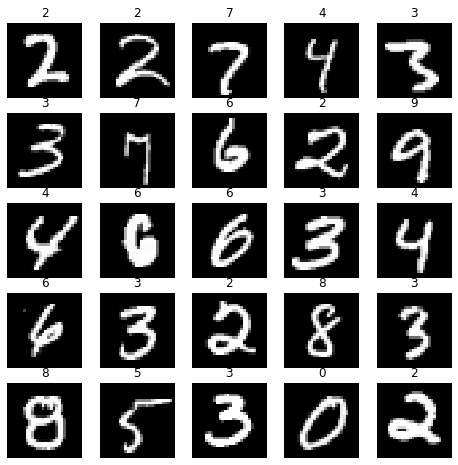

In [7]:
labels_map = {0: '0', 1: '1', 2: '2', 3: '3', 4: '4',
              5: '5', 6: '6', 7: '7', 8: '8', 9: '9'}
columns = 5
rows = 5
fig = plt.figure(figsize=(8, 8))

for i in range(1, columns*rows+1):
    data_idx = np.random.randint(len(train_data.values))
    img = train_data.values[data_idx].reshape([28, 28])
    label = labels_map[train_label[data_idx]]

    fig.add_subplot(rows, columns, i)
    plt.title(label)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
plt.show()

In [8]:
from sklearn.model_selection import train_test_split

train_data, val_data, train_label, val_label = train_test_split(train_data, train_label, test_size = 0.1, random_state=1)

In [9]:
def normalize_image(input_image):
    input_image = (input_image / 255)

    return input_image

In [10]:
def reshape_image(input_image):
    return input_image.values.reshape(-1,28,28,1)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0  73  73  73  73  73  73  73  73  42   0   0   

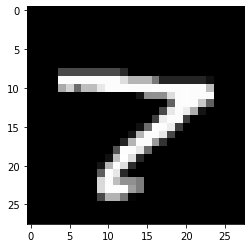

In [14]:
tmp_image = train_data.values[0].reshape([28, 28])
print(tmp_image)
plt.imshow(tmp_image,cmap='gray')

tf.Tensor(
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  73  73   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 253 252  73  73  73  73  73   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 170 210 252 252 252 252 252  73

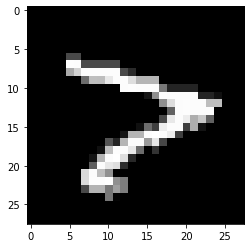

In [19]:
tmpr_image = tfa.image.rotate(tmp_image,-0.2)
print(tmpr_image)
plt.imshow(tmpr_image,cmap='gray')

In [ ]:
def random_rotation(input_image):
    # 이미지를 원하는 각도(radian)로 회전 시킵니다.
    angles = tf.random.uniform((1,),-0.2,0.2)
    rotated_image = tfa.image.rotate(input_image,angles)

    return rotated_image

In [10]:
train_data = normalize_image(train_data)
train_data = reshape_image(train_data)
val_data = normalize_image(val_data)
val_data = reshape_image(val_data)
test_data = normalize_image(test_data)
test_data = reshape_image(test_data)

train_label = train_label.values
val_label = val_label.values

In [11]:
batch_size = 20
max_epochs = 20
learning_rate = 1e-4
num_classes = 10
batch_size = 128

In [12]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_data,train_label))
train_dataset = train_dataset.shuffle(len(list(train_dataset))) # over or equal than dataset number
print(len(list(train_dataset)))
train_dataset = train_dataset.batch(batch_size) # batch_size = 128

val_dataset = tf.data.Dataset.from_tensor_slices((val_data,val_label))
val_dataset = val_dataset.batch(batch_size)

test_dataset = tf.data.Dataset.from_tensor_slices(test_data)
test_dataset = test_dataset.batch(batch_size)

print(train_dataset)
print(val_dataset)
print(test_dataset)

37800
<BatchDataset shapes: ((None, 28, 28, 1), (None,)), types: (tf.float64, tf.int64)>
<BatchDataset shapes: ((None, 28, 28, 1), (None,)), types: (tf.float64, tf.int64)>
<BatchDataset shapes: (None, 28, 28, 1), types: tf.float64>


In [16]:
class Conv(tf.keras.Model):
    def __init__(self, num_filters, kernel_size):
        super(Conv, self).__init__()
        ## 코드 시작 ##
        self.conv = tf.keras.layers.Conv2D(filters=num_filters,kernel_size=[kernel_size, kernel_size],padding='Same')
        self.bn = tf.keras.layers.BatchNormalization()
        self.relu = tf.keras.layers.ReLU()
        self.pool = tf.keras.layers.MaxPool2D(pool_size=(2,2))
        self.dropout = tf.keras.layers.Dropout(0.25)
        ## 코드 종료 ##

    def call(self, inputs, training=True):
        ## 코드 시작 ##
        x = self.conv(inputs)    # self.conv forward
        x = self.bn(x)    # self.bn   forward
        x = self.relu(x)    # self.relu forward
        x = self.pool(x)    # self.pool forward
        x = self.dropout(x)
        ## 코드 종료 ##

        return x

In [17]:
class SimpleCNN(tf.keras.Model):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        ## 코드 시작 ##
        self.conv1 = Conv(32,5)
        self.conv2 = Conv(64,3)

        self.flatten = tf.keras.layers.Flatten()
        self.dense1 = tf.keras.layers.Dense(units=256,activation=tf.nn.relu)
        self.dropout = tf.keras.layers.Dropout(0.25)
        self.dense2 = tf.keras.layers.Dense(units=num_classes,activation=tf.nn.softmax)
        ## 코드 종료 ##

    def call(self, inputs, training=True):
        ## 코드 시작 ##
        x = self.conv1(inputs)    # self.conv1 forward
        x = self.conv2(x)    # self.conv2 forward
        x = self.flatten(x)    # flatten 
        x = self.dense1(x)    # self.dense1 forward
        x = self.dropout(x)
        x = self.dense2(x)    # self.dense2 forward
        ## 코드 종료 ##

        return x

In [18]:
model = SimpleCNN()
for images, labels in train_dataset.take(1):
    print(images.shape)
    outputs = model(images, training=False)
model.summary()

(128, 28, 28, 1)

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Model: "simple_cnn_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_2 (Conv)                multiple                  960       
_________________________________________________________________
conv_3 (Conv)                multiple                  18752     
_________________________________________________________________
flatten_1 (Flatten)          multiple                  0         
_______

In [19]:
model(train_data[0:3])

<tf.Tensor: shape=(3, 10), dtype=float32, numpy=
array([[0.09742447, 0.12307967, 0.09150079, 0.09467272, 0.09954987,
        0.09289154, 0.10061582, 0.09972978, 0.09632561, 0.10420978],
       [0.10774595, 0.11898317, 0.08984996, 0.09030744, 0.108068  ,
        0.10267118, 0.08530062, 0.11126866, 0.0885056 , 0.0972994 ],
       [0.1013536 , 0.11200659, 0.09361792, 0.10247456, 0.09587319,
        0.10223745, 0.0979596 , 0.10260759, 0.08938683, 0.10248264]],
      dtype=float32)>

In [20]:
loss_object = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

In [21]:
mean_loss = tf.keras.metrics.Mean("loss")
mean_accuracy = tf.keras.metrics.Accuracy("accuracy")

In [22]:
def train_step(model, images, labels):
    ## 코드 시작 ##
    with tf.GradientTape() as tape:
        predictions = model(images)    # 위의 설명 1. 을 참고하여 None을 채우세요.
        # print(predictions)
        labels_onehot = tf.one_hot(labels,num_classes)
        loss_value = loss_object(labels_onehot,predictions)     # 위의 설명 2. 를 참고하여 None을 채우세요.

    gradients = tape.gradient(loss_value,model.trainable_variables)                # 위의 설명 3. 을 참고하여 None을 채우세요.
    optimizer.apply_gradients(zip(gradients,model.trainable_variables)) # 위의 설명 4. 를 참고하여 None을 채우세요.
    ## 코드 종료 ##
    
    mean_accuracy(labels, tf.argmax(predictions, axis=1))

    return loss_value

In [23]:
def validation(model, val_dataset, epoch):
    print('Start validation..')
    val_mean_loss = tf.keras.metrics.Mean("val_loss")
    val_mean_accuracy = tf.keras.metrics.Accuracy("val_acc")

    for step, (images, labels) in enumerate(val_dataset):
        predictions = model(images,training=False)       # 위의 설명 1. 을 참고하여 None을 채우세요.
        labels_onehot = tf.one_hot(labels,num_classes)
        val_loss_value = loss_object(labels_onehot,predictions)    # 위의 설명 2. 를 참고하여 None을 채우세요.
        val_mean_loss(val_loss_value)
        val_mean_accuracy(labels, tf.argmax(predictions, axis=1))
        
    print('Validation #{} epoch  Average Loss: {:.4g}  Accuracy: {:.4g}%\n'.format(
        epoch, val_mean_loss.result(), val_mean_accuracy.result() * 100))

    return val_mean_loss.result(), val_mean_accuracy.result()

In [24]:
def test(model, test_dataset):
    print('Start test..')
    test_mean_accuracy = tf.keras.metrics.Accuracy("test_acc")

    for step, (images, labels) in enumerate(test_dataset):
        predictions = model(images)
        test_mean_accuracy(labels, tf.argmax(predictions, axis=1))
        
    print('Test accuracy: {:.4g}%'.format(test_mean_accuracy.result() * 100))

    return test_mean_accuracy.result()

In [25]:
def save_model(model, epoch, train_dir):
    model_name = 'my_model_' + str(epoch)
    model.save_weights(os.path.join(train_dir, model_name))

In [27]:
train_dir = os.path.join('./train/exp2')
print_steps = 25
val_epoch = 1

In [28]:
def main(model, train_dataset, val_dataset, val_epoch, print_steps, save_dir):
    print('Start training..')
    num_batches_per_epoch = len(list(train_dataset))
    global_step = 0
    best_acc = 0.

    for epoch in range(max_epochs):
        for step, (images, labels) in enumerate(train_dataset):
            start_time = time.time()
            # train_step 함수 사용하여 loss 구하기
            ## 코드 시작 ##
            loss_value = train_step(model,images,labels)
            ## 코드 종료 ##
            mean_loss(loss_value)
            global_step += 1

            if global_step % print_steps == 0:
                duration = time.time() - start_time
                examples_per_sec = batch_size / float(duration)
                print("Epochs: [{}/{}] step: [{}/{}] loss: {:.4g} acc: {:.4g}%  ({:.2f} examples/sec; {:.3f} sec/batch)".format(
                    epoch+1, max_epochs, step+1, num_batches_per_epoch,
                    mean_loss.result(), mean_accuracy.result() * 100, examples_per_sec, duration))
        
        # clear the history            
        mean_loss.reset_states()
        mean_accuracy.reset_states()

        if (epoch + 1) % val_epoch == 0:
            # validation 함수 사용하여 검증하기
            # 여기서 epoch는 0부터 시작하기 때문에 + 1 을 해주시길 바랍니다.
            ## 코드 시작 ##
            val_mean_loss, val_mean_accuracy = validation(model,val_dataset,epoch+1)
            ## 코드 종료 ##
            if val_mean_accuracy > best_acc:
                print('Best performance at epoch: {}'.format(epoch + 1))
                print('Save in {}\n'.format(save_dir))
                best_acc = val_mean_accuracy
                save_model(model, epoch+1, save_dir)

    print('training done..')

In [29]:
main(model, train_dataset, val_dataset, val_epoch, print_steps, save_dir=train_dir)

Start training..
Epochs: [1/20] step: [25/296] loss: 2.142 acc: 47.47%  (6087.73 examples/sec; 0.021 sec/batch)
Epochs: [1/20] step: [50/296] loss: 1.904 acc: 58.59%  (6740.38 examples/sec; 0.019 sec/batch)
Epochs: [1/20] step: [75/296] loss: 1.62 acc: 65.06%  (6737.08 examples/sec; 0.019 sec/batch)
Epochs: [1/20] step: [100/296] loss: 1.387 acc: 69.07%  (5333.19 examples/sec; 0.024 sec/batch)
Epochs: [1/20] step: [125/296] loss: 1.211 acc: 72.25%  (6738.51 examples/sec; 0.019 sec/batch)
Epochs: [1/20] step: [150/296] loss: 1.082 acc: 74.85%  (6400.62 examples/sec; 0.020 sec/batch)
Epochs: [1/20] step: [175/296] loss: 0.9824 acc: 76.84%  (6397.57 examples/sec; 0.020 sec/batch)
Epochs: [1/20] step: [200/296] loss: 0.9016 acc: 78.59%  (6736.49 examples/sec; 0.019 sec/batch)
Epochs: [1/20] step: [225/296] loss: 0.8382 acc: 79.91%  (6408.33 examples/sec; 0.020 sec/batch)
Epochs: [1/20] step: [250/296] loss: 0.7839 acc: 81.09%  (6748.17 examples/sec; 0.019 sec/batch)
Epochs: [1/20] step: [2

Epochs: [7/20] step: [174/296] loss: 0.06005 acc: 98.27%  (6736.74 examples/sec; 0.019 sec/batch)
Epochs: [7/20] step: [199/296] loss: 0.05815 acc: 98.33%  (6736.74 examples/sec; 0.019 sec/batch)
Epochs: [7/20] step: [224/296] loss: 0.05785 acc: 98.3%  (6737.16 examples/sec; 0.019 sec/batch)
Epochs: [7/20] step: [249/296] loss: 0.05754 acc: 98.31%  (6094.92 examples/sec; 0.021 sec/batch)
Epochs: [7/20] step: [274/296] loss: 0.05735 acc: 98.33%  (6400.62 examples/sec; 0.020 sec/batch)
Start validation..
Validation #7 epoch  Average Loss: 0.06285  Accuracy: 98.19%

Best performance at epoch: 7
Save in ./train/exp2

Epochs: [8/20] step: [3/296] loss: 0.03713 acc: 98.7%  (6737.16 examples/sec; 0.019 sec/batch)
Epochs: [8/20] step: [28/296] loss: 0.0512 acc: 98.38%  (6400.01 examples/sec; 0.020 sec/batch)
Epochs: [8/20] step: [53/296] loss: 0.04869 acc: 98.57%  (6095.20 examples/sec; 0.021 sec/batch)
Epochs: [8/20] step: [78/296] loss: 0.04758 acc: 98.62%  (6736.65 examples/sec; 0.019 sec/b

Epochs: [14/20] step: [2/296] loss: 0.02642 acc: 99.22%  (5565.04 examples/sec; 0.023 sec/batch)
Epochs: [14/20] step: [27/296] loss: 0.03577 acc: 99.19%  (6400.08 examples/sec; 0.020 sec/batch)
Epochs: [14/20] step: [52/296] loss: 0.03588 acc: 99.13%  (6737.08 examples/sec; 0.019 sec/batch)
Epochs: [14/20] step: [77/296] loss: 0.03264 acc: 99.15%  (6399.55 examples/sec; 0.020 sec/batch)
Epochs: [14/20] step: [102/296] loss: 0.03005 acc: 99.18%  (5818.41 examples/sec; 0.022 sec/batch)
Epochs: [14/20] step: [127/296] loss: 0.02843 acc: 99.22%  (6736.91 examples/sec; 0.019 sec/batch)
Epochs: [14/20] step: [152/296] loss: 0.02779 acc: 99.23%  (6736.82 examples/sec; 0.019 sec/batch)
Epochs: [14/20] step: [177/296] loss: 0.0274 acc: 99.25%  (6736.82 examples/sec; 0.019 sec/batch)
Epochs: [14/20] step: [202/296] loss: 0.02738 acc: 99.24%  (5565.56 examples/sec; 0.023 sec/batch)
Epochs: [14/20] step: [227/296] loss: 0.02772 acc: 99.22%  (6736.82 examples/sec; 0.019 sec/batch)
Epochs: [14/20] 

Epochs: [20/20] step: [176/296] loss: 0.01772 acc: 99.5%  (6399.85 examples/sec; 0.020 sec/batch)
Epochs: [20/20] step: [201/296] loss: 0.01759 acc: 99.49%  (5565.27 examples/sec; 0.023 sec/batch)
Epochs: [20/20] step: [226/296] loss: 0.01827 acc: 99.46%  (6737.41 examples/sec; 0.019 sec/batch)
Epochs: [20/20] step: [251/296] loss: 0.01831 acc: 99.45%  (6737.33 examples/sec; 0.019 sec/batch)
Epochs: [20/20] step: [276/296] loss: 0.0185 acc: 99.45%  (5818.10 examples/sec; 0.022 sec/batch)
Start validation..
Validation #20 epoch  Average Loss: 0.04665  Accuracy: 98.5%

training done..


[ 187 2726 3277 3759  120   82 1110 4155 3728 2220 2562  529    7 2881
 1670 1789 3067 2793 2315 2591 2785 1776 2667    8 2344]
(25, 28, 28, 1)
(25,)
tf.Tensor(
[[1.40856037e-06 9.99115288e-01 1.82207032e-06 9.30585600e-08
  1.61740376e-04 3.30075123e-09 7.76120942e-07 6.83771854e-04
  3.02715525e-05 4.81461893e-06]
 [9.53777834e-10 4.95401986e-09 2.58169069e-10 4.16592258e-07
  1.57952109e-05 2.49996579e-10 7.29703659e-11 8.13254246e-07
  5.94957157e-07 9.99982357e-01]
 [1.55419654e-16 2.68266702e-12 1.13519041e-10 4.13296168e-11
  9.99999285e-01 1.12424925e-09 7.08585187e-12 1.60788062e-07
  2.37882858e-07 3.35869402e-07]
 [1.37158175e-13 4.39642626e-13 5.16657772e-10 9.99999881e-01
  3.66026018e-16 8.32871052e-08 1.95885348e-15 3.81189039e-11
  1.24534771e-09 4.98565367e-09]
 [9.14481969e-16 1.45927839e-13 1.39472673e-08 1.00000000e+00
  6.72515519e-19 9.76226600e-11 3.22917070e-16 9.84551995e-10
  8.33556835e-10 9.81495302e-11]
 [2.67375758e-14 8.10147305e-13 1.26331956e-09 1.00000

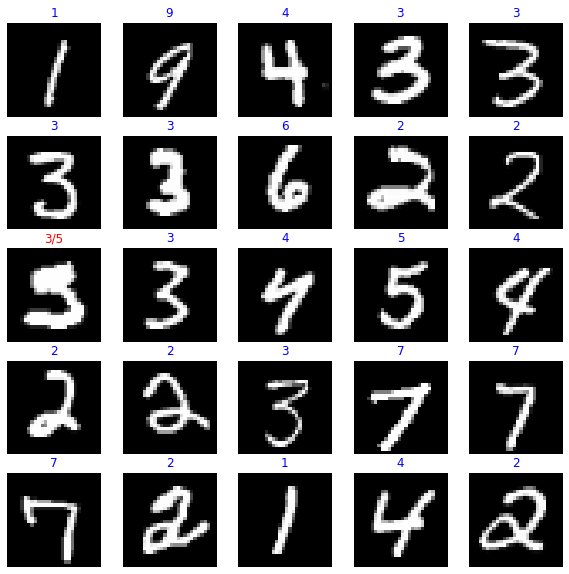

In [32]:
test_batch_size = 25
batch_index = np.random.choice(
    len(val_data), size=test_batch_size, replace=False)

print(batch_index)

batch_xs = val_data[batch_index]
batch_ys = val_label[batch_index]
y_pred_ = model(batch_xs, training=False)

print(batch_xs.shape)
print(batch_ys.shape)
print(y_pred_)

fig = plt.figure(figsize=(10, 10))
for i, (px, py, y_pred) in enumerate(zip(batch_xs, batch_ys, y_pred_)):
    p = fig.add_subplot(5, 5, i+1)
    if np.argmax(y_pred) == py:
        p.set_title("{}".format(labels_map[py]), color='blue')
    else:
        p.set_title("{}/{}".format(labels_map[np.argmax(y_pred)],
                                   labels_map[py]), color='red')
    p.imshow(px.reshape(28, 28), cmap="gray")
    p.axis('off')

In [34]:
for step, (images) in enumerate(test_dataset):
        predictions = model(images)
        print(images.shape)

(128, 28, 28, 1)
(128, 28, 28, 1)
(128, 28, 28, 1)
(128, 28, 28, 1)
(128, 28, 28, 1)
(128, 28, 28, 1)
(128, 28, 28, 1)
(128, 28, 28, 1)
(128, 28, 28, 1)
(128, 28, 28, 1)
(128, 28, 28, 1)
(128, 28, 28, 1)
(128, 28, 28, 1)
(128, 28, 28, 1)
(128, 28, 28, 1)
(128, 28, 28, 1)
(128, 28, 28, 1)
(128, 28, 28, 1)
(128, 28, 28, 1)
(128, 28, 28, 1)
(128, 28, 28, 1)
(128, 28, 28, 1)
(128, 28, 28, 1)
(128, 28, 28, 1)
(128, 28, 28, 1)
(128, 28, 28, 1)
(128, 28, 28, 1)
(128, 28, 28, 1)
(128, 28, 28, 1)
(128, 28, 28, 1)
(128, 28, 28, 1)
(128, 28, 28, 1)
(128, 28, 28, 1)
(128, 28, 28, 1)
(128, 28, 28, 1)
(128, 28, 28, 1)
(128, 28, 28, 1)
(128, 28, 28, 1)
(128, 28, 28, 1)
(128, 28, 28, 1)
(128, 28, 28, 1)
(128, 28, 28, 1)
(128, 28, 28, 1)
(128, 28, 28, 1)
(128, 28, 28, 1)
(128, 28, 28, 1)
(128, 28, 28, 1)
(128, 28, 28, 1)
(128, 28, 28, 1)
(128, 28, 28, 1)
(128, 28, 28, 1)
(128, 28, 28, 1)
(128, 28, 28, 1)
(128, 28, 28, 1)
(128, 28, 28, 1)
(128, 28, 28, 1)
(128, 28, 28, 1)
(128, 28, 28, 1)
(128, 28, 28, 

In [35]:
tmp_list = []
tmp_list = model(test_data[0:10])
tmp_list = np.argmax(tmp_list, axis=1)
print(tmp_list)
tmp_list = np.append(tmp_list,[1,2,3,4,5])
print(tmp_list)

[2 0 9 9 3 7 0 3 0 3]
[2 0 9 9 3 7 0 3 0 3 1 2 3 4 5]


In [36]:
def test(model, test_dataonly):
    print('Start test..')
    predictions = []
    
    tmp_list = []

    for step, (images) in enumerate(test_dataonly):
        predictions = np.append(predictions, np.argmax(model(images), axis=1)).astype(int)
        
    print("test done...")
    
    return predictions

In [37]:
predictions = test(model, test_dataset)

Start test..
test done...


In [38]:
results = pd.Series(predictions,name="Label")

In [39]:
results

0        2
1        0
2        9
3        9
4        3
        ..
27995    9
27996    7
27997    3
27998    9
27999    2
Name: Label, Length: 28000, dtype: int32

In [40]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("cnn_mnist_datagen.csv",index=False)